In [372]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../")

from unique_hypercube_size import create_random_A, create_random_A_shuffled, create_random_A_normal
from utils import create_block_A
%load_ext autoreload
%autoreload 2


m = 6
k = 3
S = np.sqrt(2)**np.arange(m)
# S = np.linspace(0.2,2,num=m)
# S = 1. + np.random.sample(m)*0.5 - 0.25

# A = create_random_A(m,k,S)
# A = create_random_A_shuffled(m,k,S)
A = create_random_A_normal(m,k)
# A = create_block_A(m,k,S)

print A.shape
print A.reshape((2*m,k))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(6, 2, 3)
[[-0.85075019 -1.81798623 -0.76178085]
 [ 0.10572989  0.24232685 -0.19881972]
 [ 0.98471442 -0.26920199 -0.20007086]
 [-1.47821074 -1.50913903 -0.84307077]
 [ 0.73236565  0.6379445   0.2143541 ]
 [ 0.36340131  0.42874608  1.10566147]
 [ 0.25836598  0.789135   -0.5198868 ]
 [-0.1562976  -0.86454344 -0.09056062]
 [ 0.14792186 -1.48848697 -0.47452963]
 [ 0.84587342 -0.02530818  0.4718204 ]
 [-1.51962169 -0.04581082  0.06894278]
 [ 0.76659424  0.60000283 -0.21216622]]


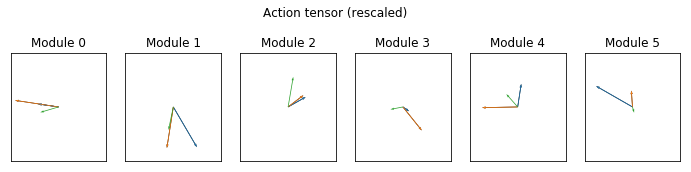

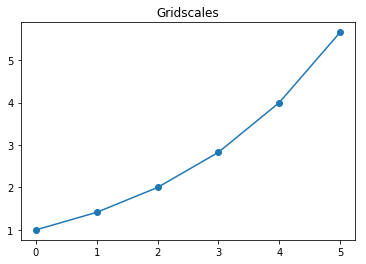

In [373]:
fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
plt.suptitle("Action tensor (rescaled)", y=1.2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

for i in range(m):
    ax[i].set_title("Module {}".format(i))
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-2,2)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    r1 = A[i,0,:] 
    r2 = A[i,1,:] 

    ax[i].quiver(0.0,0.0,r1[:2],r2[:2], angles='xy', scale_units='xy', scale=1)
    for l in range(0,k):
        ax[i].quiver(0.0,0.0,r1[l],r2[l], angles='xy', scale_units='xy', scale=1, color="C{}".format(l))


plt.show()


fig, ax = plt.subplots(1, 1);
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.4, hspace=None)

ax.set_title("Gridscales")
ax.plot(range(m), S, marker="o")

plt.show()

1.41421356237
2.0
1.41421356237
Det block matrix:	2585.32949434
Det random matrix:	2558.9765504 1330.43289182 3774.14063652


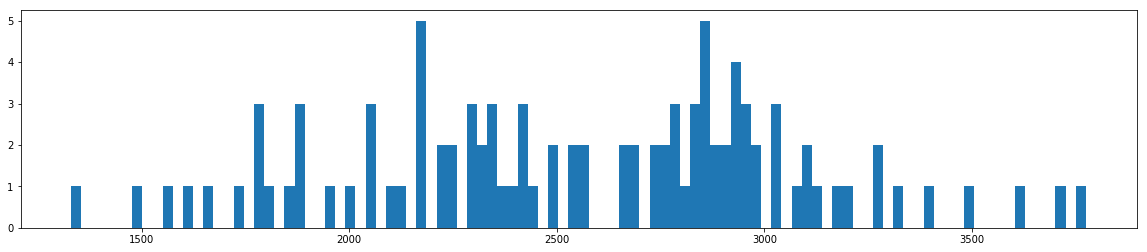

In [374]:
m = 100
k = 25
scale_fac = np.sqrt(2)
S = scale_fac**np.arange(m)
# S = 1. + np.random.sample(m)*0.2 - 0.1


print np.sqrt(np.sum((1./S)**2))
print 1./(1. - 1./scale_fac**2)
print scale_fac


T = 100

# print np.sqrt((m//k))**k
det_R = np.zeros(T)
det_R_block = np.zeros(T)

for t in range(T):
    A_rndm  = create_random_A_shuffled(m,k,S)
    A_block = create_block_A(m,k,S)

    _, R_rndm  = np.linalg.qr(A_rndm .reshape((2*m,k)))
    _, R_block = np.linalg.qr(A_block.reshape((2*m,k)))
    
    det_R[t] = np.absolute(np.linalg.det(R_rndm))
    det_R_block[t] = np.absolute(  np.linalg.det(R_block) )


print "Det block matrix:\t", np.mean(det_R_block)
print "Det random matrix:\t", np.mean(det_R), np.min(det_R), np.max(det_R)
plt.figure(figsize=(20,4))
h, b, _ = plt.hist(det_R, 100, label="Random");
# plt.plot((det_R_block[0], det_R_block[0]), (0, np.max(h)), 'k-', c="C1", linewidth=5)
# plt.plot((np.sqrt((m//k))**k, np.sqrt((m//k))**k), (0, np.max(h)), 'k-', c="C2", linewidth=2)


# plt.hist(det_R_block, 150, label="Block", range=(0,10));
# plt.legend()

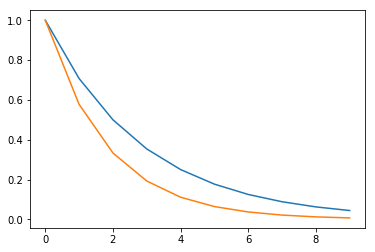

In [356]:
scale_fac = np.sqrt(2)
S = scale_fac**np.arange(10)

plt.plot(1./S)

scale_fac = np.sqrt(3)
S = scale_fac**np.arange(10)


plt.plot(1./S)